In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Including odid 

In [4]:
# Change directory
osdir = '/Users/tsengtammy/Dropbox/bang_launch1'
os.chdir(osdir)

In [5]:
# Read in nice coded csv as a DataFrame
delay_df = pd.read_csv("data/gmaps_queries/coded/combined_live_coordinates.csv")

In [52]:
# Preview beginning of DataFrame
delay_df.head()

odid  dist_bg             dt_local  month  day  hour  min  dur_bg  \
0     0     4657  2017-02-21 00:20:00      2   21     0   20     821   
1     0     4657  2017-02-21 00:40:01      2   21     0   40     821   
2     0     4657  2017-02-21 01:00:00      2   21     1    0     821   
3     0     4657  2017-02-21 01:20:00      2   21     1   20     821   
4     0     4657  2017-02-21 01:40:00      2   21     1   40     821   

        dt_local_clean   date  hff_clean  dow     delay  orig_lat  orig_long  \
0  2017-02-21 00:20:00  20871   0.333333    2  2.415718  12.91252   77.48537   
1  2017-02-21 00:40:00  20871   0.666667    2  2.379930  12.91252   77.48537   
2  2017-02-21 01:00:00  20871   1.000000    2  2.319090  12.91252   77.48537   
3  2017-02-21 01:20:00  20871   1.333333    2  2.304774  12.91252   77.48537   
4  2017-02-21 01:40:00  20871   1.666667    2  2.254670  12.91252   77.48537   

   dest_lat  dest_long  predicted_dur  predicted_delay  delay_bg  
0  12.90302   77.52204            646         2.311932  2.938229  
1  12.90302   77.52204            654         2.340563  2.938229  
2  12.90302   77.52204            656         2.347720  2.938229  
3  12.90302   77.52204            644         2.304774  2.938229  
4  12.90302   77.52204            641         2.294038  2.938229

In [5]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447988 entries, 0 to 447987
Data columns (total 19 columns):
odid               447988 non-null int64
dist_bg            447988 non-null int64
dt_local           447988 non-null object
month              447988 non-null int64
day                447988 non-null int64
hour               447988 non-null int64
min                447988 non-null int64
dur_bg             447988 non-null int64
dt_local_clean     447988 non-null object
date               447988 non-null object
hff_clean          447988 non-null float64
dow                447988 non-null int64
delay              447988 non-null float64
orig_lat           447988 non-null float64
orig_long          447988 non-null float64
dest_lat           447988 non-null float64
dest_long          447988 non-null float64
predicted_dur      447988 non-null int64
predicted_delay    447988 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 64.9+ MB


In [6]:
# Drop info not needed for prediction
delay_df.drop(['dt_local', 'month', 'day', 'hour', 'min', 'dur_bg', 'predicted_dur'],axis=1,inplace=True)

In [7]:
# Create a new datetime object from the clean time information
delay_df['dt_local_clean'] = delay_df['dt_local_clean'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), 1)

In [8]:
# Generate day of week dummies
dow = pd.get_dummies(delay_df['dow'])
delay_df = pd.concat([delay_df, dow],axis=1)
delay_df.rename(columns={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday'}, inplace=True)

In [9]:
odid = pd.get_dummies(delay_df['odid'],drop_first=True)

In [10]:
# Generate DataFrame with odid dummies
delay_df = pd.concat([delay_df, odid],axis=1)

In [58]:
delay_df.head()

odid  dist_bg      dt_local_clean   date  hff_clean  dow     delay  \
0     0     4657 2017-02-21 00:20:00  20871   0.333333    2  2.415718   
1     0     4657 2017-02-21 00:40:00  20871   0.666667    2  2.379930   
2     0     4657 2017-02-21 01:00:00  20871   1.000000    2  2.319090   
3     0     4657 2017-02-21 01:20:00  20871   1.333333    2  2.304774   
4     0     4657 2017-02-21 01:40:00  20871   1.666667    2  2.254670   

   orig_lat  orig_long  dest_lat ...   168  169  170  171  172  173  174  175  \
0  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   176  177  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 195 columns]

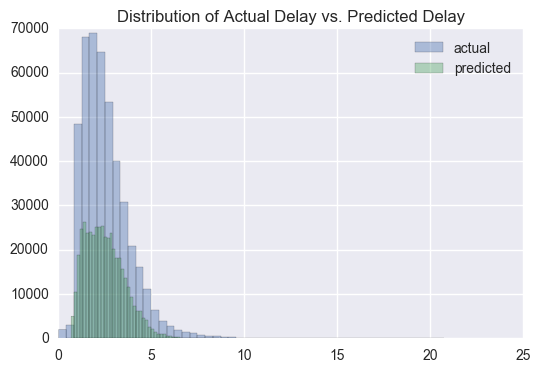

In [21]:
# Delay distribution
sns.distplot(delay_df['delay'], kde=False)
sns.distplot(delay_df['predicted_delay'], kde=False)
plt.title('Distribution of Actual Delay vs. Predicted Delay')
plt.legend(['actual','predicted'])
plt.xlabel('')

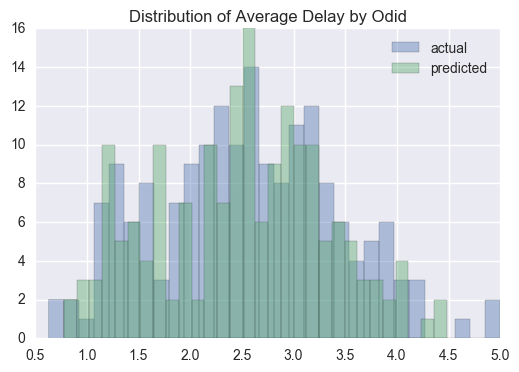

In [23]:
# Collapse by odid and plot distribution of average delay
sns.distplot(delay_df.groupby('odid').mean()['delay'], kde=False, bins=30)
sns.distplot(delay_df.groupby('odid').mean()['predicted_delay'], kde=False, bins=30)
plt.title('Distribution of Average Delay by Odid')
plt.legend(['actual','predicted'])
plt.xlabel('')

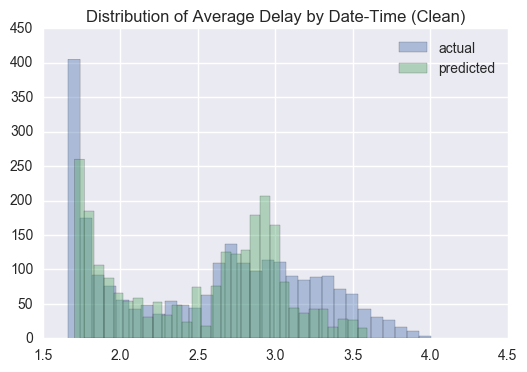

In [24]:
# Collapse by date and plot distribution of average delay
sns.distplot(delay_df.groupby('dt_local_clean').mean()['delay'], kde=False, bins=30)
sns.distplot(delay_df.groupby('dt_local_clean').mean()['predicted_delay'], kde=False, bins=30)
plt.title('Distribution of Average Delay by Date-Time (Clean)')
plt.legend(['actual','predicted'])
plt.xlabel('')

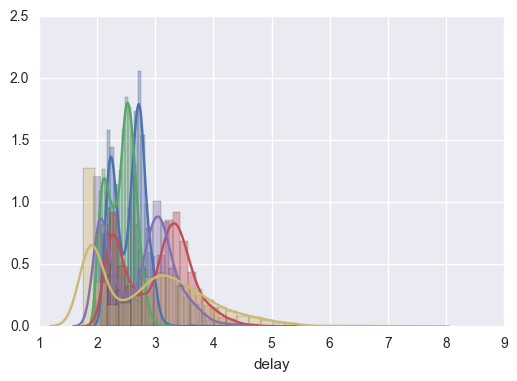

In [40]:
# Distribution plots of delay by odid (select)
sns.distplot(delay_df[delay_df['odid']==0]['delay'])
sns.distplot(delay_df[delay_df['odid']==1]['delay'])
sns.distplot(delay_df[delay_df['odid']==2]['delay'])
sns.distplot(delay_df[delay_df['odid']==3]['delay'])
sns.distplot(delay_df[delay_df['odid']==49]['delay'])

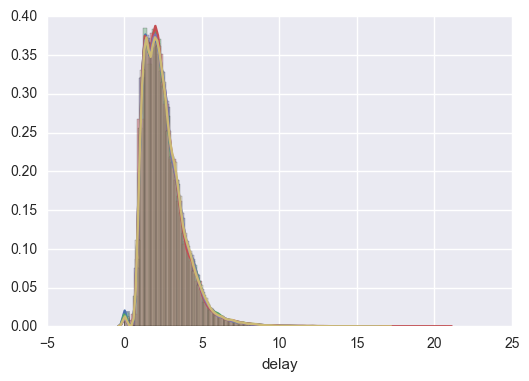

In [107]:
# Distribution plots of delay by day of week: not much difference
sns.distplot(delay_df[delay_df['Monday']==1['delay'])
sns.distplot(delay_df[delay_df['Tuesday']==1]['delay'])
sns.distplot(delay_df[delay_df['Wednesday']==1]['delay'])
sns.distplot(delay_df[delay_df['Thursday']==1]['delay'])
sns.distplot(delay_df[delay_df['Friday']==1]['delay'])

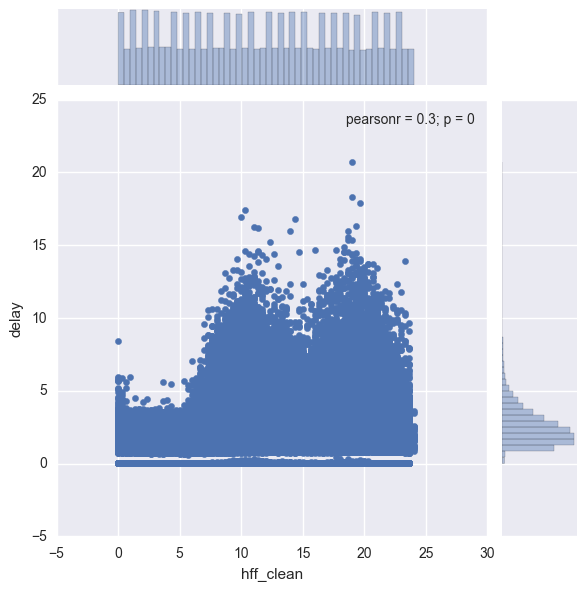

In [43]:
# Delay vs hff_clean
sns.jointplot(x='hff_clean', y='delay', data=delay_df)

In [11]:
# drop duplicates (keep first)
delay_df_D = delay_df.drop_duplicates(['odid', 'dt_local_clean'])

In [12]:
delay_df_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433223 entries, 0 to 447987
Columns: 195 entries, odid to 177
dtypes: datetime64[ns](1), float64(190), int64(4)
memory usage: 647.8 MB


In [13]:
delay_df_D.head()

odid  dist_bg      dt_local_clean   date  hff_clean  dow     delay  \
0     0     4657 2017-02-21 00:20:00  20871   0.333333    2  2.415718   
1     0     4657 2017-02-21 00:40:00  20871   0.666667    2  2.379930   
2     0     4657 2017-02-21 01:00:00  20871   1.000000    2  2.319090   
3     0     4657 2017-02-21 01:20:00  20871   1.333333    2  2.304774   
4     0     4657 2017-02-21 01:40:00  20871   1.666667    2  2.254670   

   orig_lat  orig_long  dest_lat ...   168  169  170  171  172  173  174  175  \
0  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  12.91252   77.48537  12.90302 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   176  177  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 195 columns]

In [60]:
grouped = delay_df_D.groupby(['dt_local_clean'])
g = grouped.mean()['delay']
g.plt()

AttributeError: 'Series' object has no attribute 'plt'

UnboundLocalError: local variable 'units' referenced before assignment

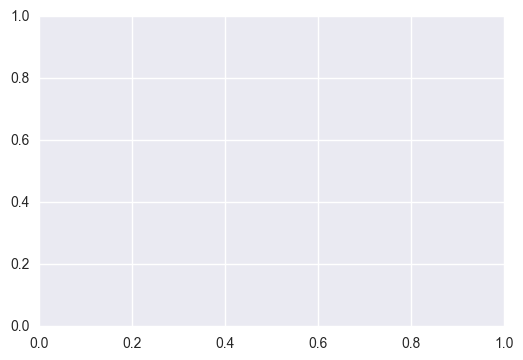

In [26]:
sns.tsplot(data=g, color='red', time='dt_local_clean', unit='odid', interpolate=False, value='delay')

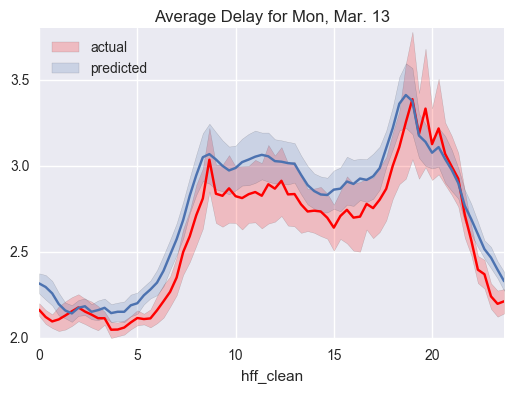

In [54]:
# plot delay for day Mar. 13 (Monday), error representation is collapsed over odid's
sns.tsplot(data=delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==13)] , color='red', time='hff_clean', unit='odid', value='delay')
sns.tsplot(data=delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==13)] , time='hff_clean', unit='odid', value='predicted_delay')
plt.title('Average Delay for Mon, Mar. 13')
plt.legend(['actual','predicted'], loc=2)
plt.ylabel('')

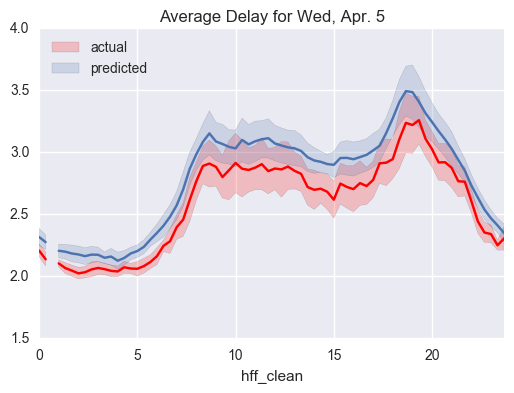

In [55]:
# plot delay for day Apr. 5 (Wednesday), error representation is collapsed over odid's
sns.tsplot(data=delay_df_D[(delay_df_D['month']==4) & (delay_df_D['day']==5)] , color='red', time='hff_clean', unit='odid', value='delay')
sns.tsplot(data=delay_df_D[(delay_df_D['month']==4) & (delay_df_D['day']==5)] , time='hff_clean', unit='odid', value='predicted_delay')
plt.title('Average Delay for Wed, Apr. 5')
plt.legend(['actual','predicted'], loc=2)
plt.ylabel('')

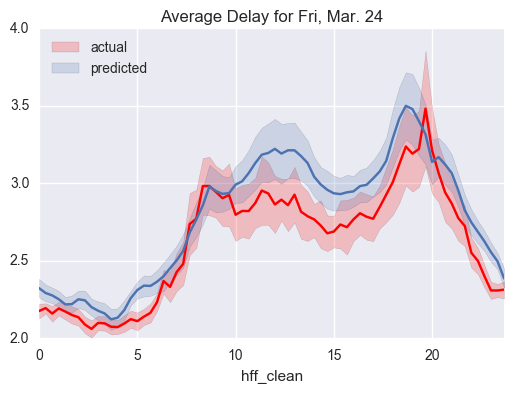

In [56]:
# plot delay for day Mar. 24 (Friday), error representation is collapsed over odid's
sns.tsplot(data=delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==24)] , color='red', time='hff_clean', unit='odid', value='delay')
sns.tsplot(data=delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==24)] , time='hff_clean', unit='odid', value='predicted_delay')
plt.title('Average Delay for Fri, Mar. 24')
plt.legend(['actual','predicted'], loc=2)
plt.ylabel('')

In [29]:
# plot delay, by odid : TAKES TOO LONG TO RUN
#sns.tsplot(data=delay_df_D, time='dt_local_clean', value='delay', condition='odid')

### Visualize time series (using data with duplicates dropped)

In [32]:
import plotly
import cufflinks as cf
plotly.offline.init_notebook_mode()
cf.go_offline()

In [34]:
predicted_v_actual = {
    'data': [
        {
            'x':delay_df_D[delay_df_D['odid']==21]['dt_local_clean'],
            'y':delay_df_D[delay_df_D['odid']==21]['delay'],
            'name': 'actual',
            'opacity':0.5
        },
        {
            'x':delay_df_D[delay_df_D['odid']==21]['dt_local_clean'],
            'y':delay_df_D[delay_df_D['odid']==21]['predicted_delay'],
            'name': 'predicted',
            'opacity':0.5
        }
    ],
    'layout': {
        'title': 'Predicted vs. Actual Delay for Odid 21',
        'yaxis': {'title': 'delay'}
    }
}

In [35]:
plotly.offline.iplot(predicted_v_actual)

In [36]:
ts_fig = {
    'data': [
        {
            'x':delay_df_D[delay_df_D['odid']==odid]['dt_local_clean'],
            'y':delay_df_D[delay_df_D['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in [0, 50, 100]
    ],
    'layout': {
        'title': 'Actual Delay for Select Odids',
        'yaxis': {'title': 'delay'}
    }
}

In [13]:
plotly.offline.iplot(ts_fig)

Take the week of Mar 13-Mar 17

In [38]:
week = delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']>=13) & (delay_df_D['day']<=17)]

In [42]:
predicted_v_actual_week = {
    'data': [
        {
            'x':week[week['odid']==21]['dt_local_clean'],
            'y':week[week['odid']==21]['delay'],
            'name': 'actual',
            'opacity':0.5
        },
        {
            'x':week[week['odid']==21]['dt_local_clean'],
            'y':week[week['odid']==21]['predicted_delay'],
            'name': 'predicted',
            'opacity':0.5
        }
    ],
    'layout': {
        'title': 'Predicted vs. Actual Delay for Odid 21: Week of Mar 13-Mar 17',
        'yaxis': {'title': 'delay'}
    }
}

In [43]:
plotly.offline.iplot(predicted_v_actual_week)

In [15]:
week_fig = {
    'data': [
        {
            'x':week[week['odid']==odid]['dt_local_clean'],
            'y':week[week['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in [0, 50, 100]
    ],
    'layout': {
        'title': 'Actual Delay for Select Odids: Week of Mar 13-Mar 17',
        'yaxis': {'title': 'delay'}
    }
}

In [16]:
plotly.offline.iplot(week_fig)

Now just take the day of Mar 13 (Monday)

In [44]:
mar13 = delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==13)]

In [45]:
predicted_v_actual_mar13 = {
    'data': [
        {
            'x':mar13[mar13['odid']==21]['dt_local_clean'],
            'y':mar13[mar13['odid']==21]['delay'],
            'name': 'actual',
            'opacity':0.5
        },
        {
            'x':mar13[mar13['odid']==21]['dt_local_clean'],
            'y':mar13[mar13['odid']==21]['predicted_delay'],
            'name': 'predicted',
            'opacity':0.5
        }
    ],
    'layout': {
        'title': 'Predicted vs. Actual Delay for Odid 21: Day of Monday, Mar 13',
        'yaxis': {'title': 'delay'}
    }
}

In [46]:
plotly.offline.iplot(predicted_v_actual_mar13)

In [18]:
mar13_fig = {
    'data': [
        {
            'x':mar13[mar13['odid']==odid]['dt_local_clean'],
            'y':mar13[mar13['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in [0, 50, 100]
    ],
    'layout': {
        'title': 'Delay for Select Odids: Day of Monday, Mar 13',
        'yaxis': {'title': 'delay'}
    }
}

In [19]:
plotly.offline.iplot(mar13_fig)

In [20]:
mar13_fig_all = {
    'data': [
        {
            'x':mar13[mar13['odid']==odid]['dt_local_clean'],
            'y':mar13[mar13['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in range(178)
    ],
    'layout': {
        'title': 'Delay for All Odids: Day of Monday, Mar 13',
        'yaxis': {'title': 'delay'}
    }
}

In [21]:
plotly.offline.iplot(mar13_fig_all)

## Split into train and test datasets

using the dataset with duplicates. try with duplicates dropped?

In [28]:
import random

In [30]:
# Split randomly by odid: 70% of odid's in a train set, 30% in a test set
max_odid = max(delay_df['odid'])
train_odids = random.sample(range(1, max_odid), int(round(0.7 * max_odid)))

In [31]:
# DataFrame with train data
train_delay_df = delay_df[delay_df['odid'].isin(train_odids)]

In [32]:
# DataFrame with test data
test_delay_df = delay_df[~delay_df['odid'].isin(train_odids)]

In [33]:
X_train = train_delay_df.drop(['odid','delay','dt_local_clean','dow'],axis=1)
y_train = train_delay_df['delay']

X_test = test_delay_df.drop(['odid','delay','dt_local_clean','dow'],axis=1)
y_test = test_delay_df['delay']

In [34]:
X_train.head()

dist_bg   date  hff_clean  orig_lat  orig_long  dest_lat  dest_long  \
2518     1045  20871   0.333333  12.90302   77.52204  12.90428   77.53116   
2519     1045  20871   0.666667  12.90302   77.52204  12.90428   77.53116   
2520     1045  20871   1.000000  12.90302   77.52204  12.90428   77.53116   
2521     1045  20871   1.333333  12.90302   77.52204  12.90428   77.53116   
2522     1045  20871   1.666667  12.90302   77.52204  12.90428   77.53116   

      predicted_delay  delay_bg  Monday ...   168  169  170  171  172  173  \
2518         2.328549  2.791069     0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2519         2.248804  2.791069     0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2520         2.216906  2.791069     0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2521         2.216906  2.791069     0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2522         2.216906  2.791069     0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   

      174  175  176  177  
2518  0.0  0.0  0.0  0.0  
2519  0.0  0.0  0.0  0.0  
2520  0.0  0.0  0.0  0.0  
2521  0.0  0.0  0.0  0.0  
2522  0.0  0.0  0.0  0.0  

[5 rows x 191 columns]

note: 

• adding odid dummies to baseline dataset improved performance (esp for MLP --> train!)

• adding dow dummies to baseline dataset worsened performance

• adding dow dummies to baseline + odid dummy dataset worsened performance

## Linear Regression: Lasso

In [24]:
from sklearn.linear_model import Lasso

### Lasso Model 1
* **Predictors**: **predicted_delay** 
* **Adj R2**: 0.711


In [88]:
lm = Lasso(alpha=.3) # better than .1. iterate through?

In [89]:
lm.fit(X_train['predicted_delay'].reshape(-1,1),y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
# Adj R^2 of the prediction
lm.score(X_test['predicted_delay'].reshape(-1,1), y_test)

0.71098404141587224

In [92]:
print(lm.intercept_)
lm_coeff = pd.DataFrame(lm.coef_, ['predicted delay'], columns=['Coefficient'])
lm_coeff.sort_values(by='Coefficient')

0.469693369378


Coefficient
predicted delay     0.842041

### Lasso Model 2
* **Predictors**: predicted_delay, **delay_bg, dist_bg, date, hff_clean, orig_lat, orig_long, dest_lat, dest_long, DOW dummies (Monday, Tuesday, Wednesday, Thursday, Friday)**
* **Adj R2**: 0.710

Everything we added made no difference, except for date, dist_bg, and hff_clean which actually made performance slightly worse.

In [75]:
lm2 = Lasso(alpha=.3)

In [107]:
lm2.fit(X_train[['predicted_delay','delay_bg','date','dist_bg','hff_clean','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday']], y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
lm2.score(X_test[['predicted_delay','delay_bg','date','dist_bg','hff_clean','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday']], y_test)

0.70954983095842761

In [109]:
print(lm2.intercept_)
lm2_coeff = pd.DataFrame(lm2.coef_, ['predicted_delay','delay_bg','date','hff_clean','dist_bg','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday'], columns=['Coefficient'])
lm2_coeff.sort_values(by='Coefficient',ascending=False)

-6.46069429215


Coefficient
predicted_delay     0.819564
dist_bg             0.010288
date                0.000331
delay_bg            0.000000
orig_lat           -0.000000
orig_long           0.000000
dest_lat           -0.000000
dest_long           0.000000
Monday              0.000000
Tuesday            -0.000000
Wednesday          -0.000000
Thursday           -0.000000
Friday              0.000000
hff_clean          -0.000017

### Lasso Model 3
* **Predictors**: predicted_delay, delay_bg, dist_bg, date, hff_clean, orig_lat, orig_long, dest_lat, dest_long, DOW dummies (Monday, Tuesday, Wednesday, Thursday, Friday), **ODID dummies**
* **Adj R2**: 0.710

No difference from Model 2

In [99]:
lm3 = Lasso(alpha=.3)

In [110]:
lm3.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
lm3.score(X_test, y_test)

0.70954809483272063

In [112]:
print(lm3.intercept_)
lm3_coeff = pd.DataFrame(lm3.coef_, X_train.columns, columns=['Coefficient'])
lm3_coeff.sort_values(by='Coefficient',ascending=False).head(12)

-6.46076158772


Coefficient
predicted_delay     0.819558
hff_clean           0.010289
date                0.000331
82                  0.000000
118                -0.000000
109                 0.000000
110                 0.000000
111                 0.000000
112                 0.000000
113                 0.000000
114                 0.000000
115                 0.000000

## Linear regression: Ridge

In [114]:
from sklearn.linear_model import Ridge

### Ridge Model 1
* **Predictors**: **predicted_delay** 
* **Adj R2**: 0.742

In [115]:
lr = Ridge(alpha=.1) # better than .1. iterate through?

In [116]:
lr.fit(X_train['predicted_delay'].reshape(-1,1),y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [123]:
# Adj R^2 of the prediction
lr.score(X_test['predicted_delay'].reshape(-1,1), y_test)

0.7421352368595594

In [126]:
print(lr.intercept_)
lr_coeff = pd.DataFrame(lr.coef_, ['predicted delay'], columns=['Coefficient'])
lr_coeff.sort_values(by='Coefficient')

-0.133980052402


Coefficient
predicted delay      1.07996

### Ridge Model 2
* **Predictors**: predicted_delay, **delay_bg, dist_bg, date, hff_clean, orig_lat, orig_long, dest_lat, dest_long, DOW dummies (Monday, Tuesday, Wednesday, Thursday, Friday)**
* **Adj R2**: 0.742

In [119]:
lr2 = Ridge(alpha=.1)

In [120]:
lr2.fit(X_train[['predicted_delay','delay_bg','date','dist_bg','hff_clean','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday']], y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
lr2.score(X_test[['predicted_delay','delay_bg','date','dist_bg','hff_clean','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday']], y_test)

0.74235896033526116

In [127]:
print(lr2.intercept_)
lr2_coeff = pd.DataFrame(lr2.coef_, ['predicted_delay','delay_bg','date','hff_clean','dist_bg','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday'], columns=['Coefficient'])
lr2_coeff.sort_values(by='Coefficient',ascending=False)

-125.126482805


Coefficient
predicted_delay     1.130323
dest_lat            0.669694
dest_long           0.621268
orig_long           0.458590
Friday              0.050642
Monday              0.033019
date                0.002025
hff_clean           0.000006
dist_bg            -0.000400
Tuesday            -0.010641
Wednesday          -0.025884
Thursday           -0.047136
delay_bg           -0.076574
orig_lat           -0.750968

### Ridge Model 3
* **Predictors**: predicted_delay, delay_bg, dist_bg, date, hff_clean, orig_lat, orig_long, dest_lat, dest_long, DOW dummies (Monday, Tuesday, Wednesday, Thursday, Friday), **ODID dummies**
* **Adj R2**: 0.102

Significantly penalized for the ODID dummies

In [128]:
lr3 = Ridge(alpha=.1)

In [129]:
lr3.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [130]:
lr3.score(X_test, y_test)

0.10163841376985394

In [131]:
print(lr3.intercept_)
lr3_coeff = pd.DataFrame(lr3.coef_, X_train.columns, columns=['Coefficient'])
lr3_coeff.sort_values(by='Coefficient',ascending=False).head(12)

-148.229931109


Coefficient
153     1.967480
62      1.844793
94      1.748699
152     1.735648
28      1.644641
29      1.539619
52      1.519351
60      1.517196
59      1.491909
61      1.470319
21      1.457501
58      1.378136

## Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest Model 1
* **Predictors**: **predicted_delay** 
* **Adj R2**: 0.742

In [133]:
rf = RandomForestRegressor()

In [134]:
rf.fit(X_train['predicted_delay'].reshape(-1,1),y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [123]:
# Adj R^2 of the prediction
rf.score(X_test['predicted_delay'].reshape(-1,1), y_test)

0.7421352368595594

In [135]:
# Feature importance array
rf_feat = pd.DataFrame(rf.feature_importances_, ['predicted_delay'], columns=["importance"]).sort_values('importance', ascending=False)
rf_feat

importance
predicted_delay         1.0

### Random Forest Model 2
* **Predictors**: predicted_delay, **delay_bg, dist_bg, date, hff_clean, orig_lat, orig_long, dest_lat, dest_long, DOW dummies (Monday, Tuesday, Wednesday, Thursday, Friday)**
* **Adj R2**: 0.653

In [136]:
rf2 = RandomForestRegressor()

In [137]:
rf2.fit(X_train[['predicted_delay','delay_bg','date','dist_bg','hff_clean','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday']], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [138]:
rf2.score(X_test[['predicted_delay','delay_bg','date','dist_bg','hff_clean','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday']], y_test)

0.65335423251099911

In [140]:
rf2_feat = pd.DataFrame(rf2.feature_importances_, ['predicted_delay','delay_bg','date','hff_clean','dist_bg','orig_lat','orig_long','dest_lat','dest_long','Monday','Tuesday','Wednesday','Thursday','Friday'], columns=["importance"]).sort_values('importance', ascending=False)
rf2_feat

importance
predicted_delay    0.787806
date               0.057338
dist_bg            0.048225
delay_bg           0.026796
hff_clean          0.020926
dest_long          0.012363
orig_long          0.010292
dest_lat           0.008271
orig_lat           0.008178
Friday             0.007221
Wednesday          0.003878
Thursday           0.003088
Monday             0.002948
Tuesday            0.002670

### Random Forest Model 3
* **Predictors**: predicted_delay, delay_bg, dist_bg, date, hff_clean, orig_lat, orig_long, dest_lat, dest_long, DOW dummies (Monday, Tuesday, Wednesday, Thursday, Friday), **ODID dummies**
* **Adj R2**: 0.693

Better than Model 2, worse than Model 1

In [141]:
rf3 = RandomForestRegressor()

In [142]:
rf3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [143]:
rf3.score(X_test, y_test)

0.69343530207388449

In [145]:
# Feature importance array
rf3_feat = pd.DataFrame(rf3.feature_importances_, X_train.columns, columns=["importance"]).sort_values('importance', ascending=False)
rf3_feat.head(12)

importance
predicted_delay    0.788517
date               0.057671
hff_clean          0.046673
delay_bg           0.022410
dist_bg            0.014908
dest_long          0.009239
Friday             0.007751
orig_long          0.007201
orig_lat           0.006276
dest_lat           0.005510
Wednesday          0.003883
Thursday           0.002965

## Neural Net: Multilayer Perceptron (SKlearn)

In [35]:
# NEED TO iterate through parameters for batch size, alpha
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

predicted_delay, dist_bg, hff_clean, delay_bg, date
1. alpha = 0.0001, R2 = 0.7449
2. alpha = 0.001, R2 = 0.7452
3. alpha = 0.01, R2 = 0.7521
4. alpha = 0.1, R2 = 0.7599
5. alpha = 1, R2 = 0.7453

predicted_delay, dist_bg, hff_clean, delay_bg, date, orig_lat, orig_long, dest_lat, dest_long
1. alpha = 0.0001, R2 = 0.7198
2. alpha = 0.01, R2 = 0.7421
3. alpha = 0.1, R2 = 0.7630
4. alpha = 1, R2 = 0.7473

In [65]:
mlp = MLPRegressor(alpha=1)

In [37]:
# MLP is sensitive to feature scaling
scaler = StandardScaler()

In [54]:
scaler.fit(X_train[['predicted_delay','dist_bg','hff_clean','delay_bg','date','orig_lat','orig_long','dest_lat','dest_long']])
X_train_scaled = scaler.transform(X_train[['predicted_delay','dist_bg','hff_clean','delay_bg','date','orig_lat','orig_long','dest_lat','dest_long']])
X_test_scaled = scaler.transform(X_test[['predicted_delay','dist_bg','hff_clean','delay_bg','date','orig_lat','orig_long','dest_lat','dest_long']])

In [66]:
mlp.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [67]:
# Adj R^2 of the prediction
mlp.score(X_test_scaled, y_test)

0.74727937250897158